In [6]:
#MODULOS A IMPORTAR
import numpy as np
import lattpy as lp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
import time  # Importar time para medir el tiempo


In [7]:
#FUNCIONES UTILIZADAS

def crear_atomos(latt, num_atoms, dimensiones=7):
    """
    Crea átomos en la red con posiciones aleatorias y únicas.
    
    Parámetros:
    latt: objeto de la red donde se agregarán los átomos.
    num_atoms: número de átomos a crear.
    dimensiones: número de dimensiones del espacio (por defecto 7).

    Retorna:
    None
    """
    # Crear un conjunto para asegurarnos de que las posiciones sean únicas
    posiciones_generadas = set()

    while len(posiciones_generadas) < num_atoms:
        # Generar coordenadas aleatorias en [0, 1] para todas las dimensiones
        coords = tuple(np.random.rand(dimensiones))  # np.random.rand genera valores en [0, 1)
        posiciones_generadas.add(coords)  # Añadir a un conjunto asegura unicidad

    # Agregar átomos únicos a la red
    for i, coords in enumerate(posiciones_generadas):
        nombre = f"Atom_{i + 1}"  # Nombra los átomos de forma automática
        latt.add_atom(list(coords), nombre)

# Función para generar los puntos del retículo
def generar_puntos_reticulo(base, limite):
    """
    Genera todos los puntos del retículo dados los vectores base y un límite de los enteros.

    base: matriz de base (n x n) que genera el retículo.
    limite: rango de los valores enteros para las combinaciones.

    Retorna un arreglo con todos los puntos del retículo.
    """
    # Generamos todas las combinaciones posibles de los enteros para k1, k2, ..., kn
    posibles_k = list(product(range(-limite, limite + 1), repeat=base.shape[0]))

    # Generamos los puntos del retículo como combinaciones lineales de los vectores base
    puntos_reticulo = []
    for k in posibles_k:
        punto = sum(k[i] * base[i] for i in range(len(k)))
        puntos_reticulo.append(punto)
    
    return np.array(puntos_reticulo)



#Funcion para calcular el vector mas cercano dado un punto
def nearestVector(base, limite, puntos_reticulo, target_point):
    """
    Encuentra el vector más cercano desde un punto objetivo (target_point) a todos los puntos del retículo.
    
    base: matriz de base del retículo.
    limite: rango de los índices.
    puntos_reticulo: arreglo con los puntos del retículo generados.
    target_point: punto objetivo desde el cual buscar el vector más cercano.
    
    Retorna el vector más cercano y su norma.
    """
    
    # Inicializar variables para almacenar el mejor vector y su norma más baja
    mejor_vector = None
    menor_norma = float('inf')

    # Iterar sobre todos los puntos del retículo
    for punto in puntos_reticulo:
        if not np.array_equal(punto, target_point):  # Evitar el propio punto objetivo
            vector = punto - target_point  # Vector entre el punto objetivo y el punto del retículo
            norma = np.linalg.norm(vector)  # Calcular la norma del vector

            # Si encontramos un vector con norma menor, lo actualizamos
            if norma < menor_norma:
                mejor_vector = vector
                menor_norma = norma
    
    return mejor_vector, menor_norma


# Función para calcular el vector más corto entre todos los puntos del retículo
def shortestVector(base, limite, puntos_reticulo):
    """
    Encuentra el vector más corto entre todos los puntos del retículo generado por los vectores base,
    excluyendo el origen. Considera todas las combinaciones posibles de pares de puntos.

    base: matriz de base del retículo.
    limite: rango de los índices.

    Retorna el vector más corto y su norma.
    """
    
    # Inicializar variables para almacenar el mejor vector y su norma más baja
    mejor_vector = None
    menor_norma = float('inf')

    # Iterar sobre todos los pares de puntos posibles
    for i, punto_1 in enumerate(puntos_reticulo):
        for j, punto_2 in enumerate(puntos_reticulo):
            if i != j:  # Evitar calcular el vector entre un punto y él mismo
                vector = punto_2 - punto_1  # Vector entre el par de puntos
                norma = np.linalg.norm(vector)  # Calcular la norma del vector
                
                # Si encontramos un vector con norma menor, lo actualizamos
                if norma < menor_norma:
                    mejor_vector = vector
                    menor_norma = norma
    
    return mejor_vector, menor_norma




In [8]:
#AQUI ESTAMOS GENERANDO UN RETICULO CON 1 SOLA DIMENSION (UNA MATRIZ 1X1) QUE ES LO MISMO QUE UN ESCALAR
latt = lp.Lattice(1.0)
latt.vectors

array([[1.]])

In [9]:
#esta vez es de 2 dimensiones (matriz 2x2)
latt = lp.Lattice(np.eye(2))
latt.vectors

array([[1., 0.],
       [0., 1.]])

vectores base:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


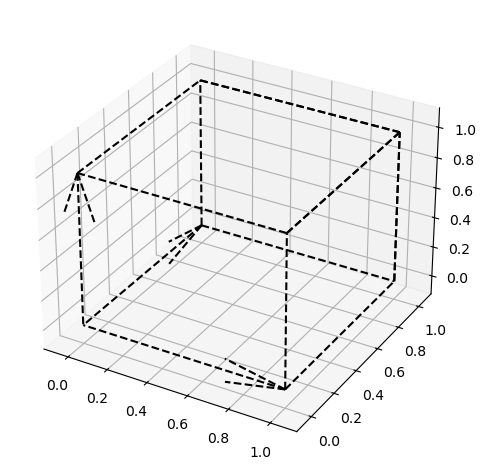

In [5]:
#Initializes a 3D simple cubic lattice.
latt= lp.Lattice.sc(a=1)
print("vectores base: ",latt.vectors)
latt.plot_cell()
plt.show()

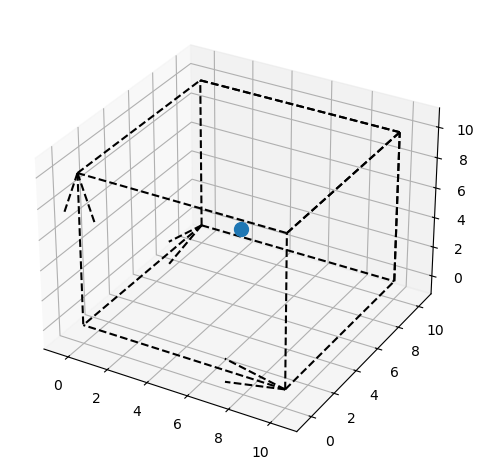

In [5]:
#Hasta ahora solo hemos definido los vectores base, para crear un reticulo necesitamos definir atomos
latt= lp.Lattice.sc(a=10)
latt.add_atom([5.0, 5.0, 5.0], "A")
latt.plot_cell()
plt.show()

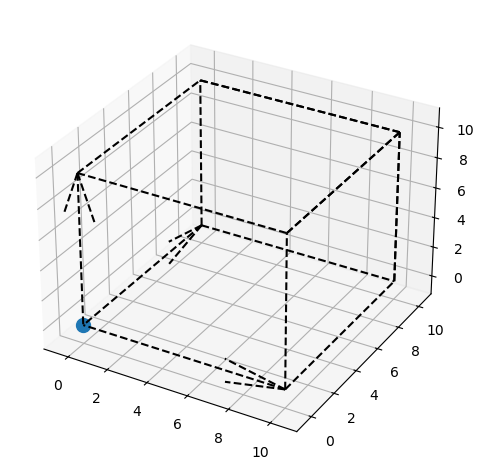

In [7]:
#If the position is omitted the atom is placed at the origin of the unit cell (en este caso 0,0,0
latt= lp.Lattice.sc(a=10)
latt.add_atom()
latt.plot_cell()
plt.show()

In [8]:
latt= lp.Lattice.sc(a=10)
latt.add_atom([0.0, 0.0,0.0], "A")
latt.add_atom([4.5, 0.5, 0.5], lp.Atom("B"))
print(latt.atoms[0])
print(latt.atoms[1])

Atom(A, radius=0.2, 2)
Atom(B, radius=0.2, 3)


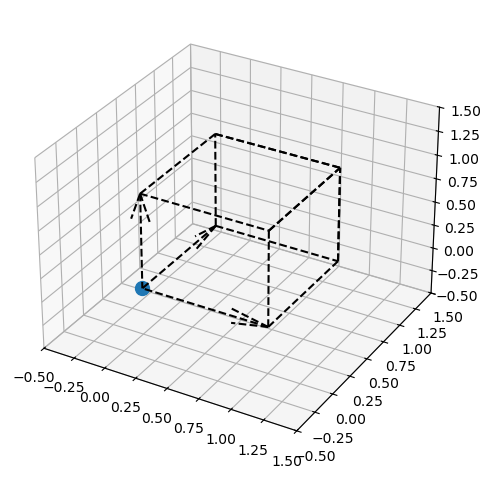

In [9]:
#Podemos modificar cuanto vemos de los ejex x,y,z (los vectores base no cambian)
latt= lp.Lattice.sc(a=1)
latt.add_atom([0.0, 0.0,0.0], "A")
ax = latt.plot_cell()
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_zlim(-0.5, 1.5)
plt.show()

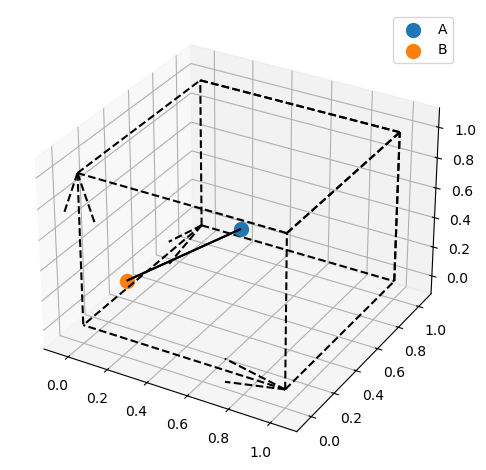

In [10]:
#AÑADIR CONEXIONES:
"""
Finalmente, las conexiones de los átomos con sus vecinos deben configurarse. LattPy conecta 
automáticamente los vecinos de los sitios hasta un nivel especificado de distancias entre vecinos, 
es decir, primeros vecinos, segundos vecinos, y así sucesivamente. La distancia máxima entre vecinos 
puede configurarse de manera independiente para cada par de átomos.
Por ejemplo, si se asume una red cubica con dos átomos A y B en la celda unitaria,
las conexiones entre los átomos A pueden configurarse hasta los segundos vecinos, 
mientras que las conexiones entre los átomos A y B pueden limitarse únicamente a los primeros vecinos.
"""

latt = lp.Lattice.sc(a=1)
latt.add_atom([0.50, 0.50, 0.50], "A")
latt.add_atom([0.1, 0.2, 0.2], "B")
#EN ESTE CASO A Y B SOLO SE CONECTARAN A 1 VECINO MAS CERCANO, EN ESTE CASO SON PARA A: B Y PARA B: A
latt.add_connection("A", "B", 1)
latt.analyze()
latt.plot_cell()
plt.show()

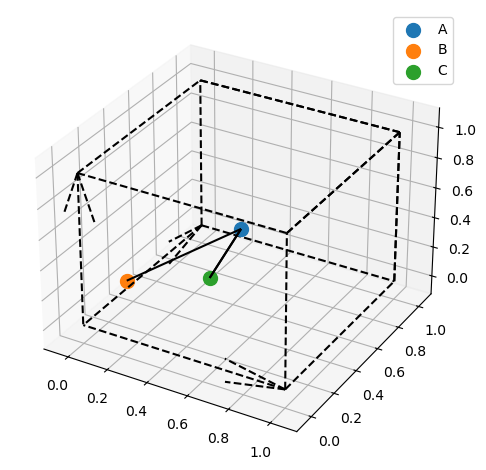

In [11]:
latt = lp.Lattice.sc(a=1)
latt.add_atom([0.50, 0.50, 0.50], "A")
latt.add_atom([0.1, 0.2, 0.2], "B")
latt.add_atom([0.4, 0.4 ,0.2], "C")
#SI METEMOS UN NUEVO PUNTO C MAS CERCANO A "A" QUE "A" DE "B", ENTONCES QUEDARIA ASI
latt.add_connection("A", "B", 1)
latt.add_connection("A", "C", 1)
latt.analyze()
latt.plot_cell()
plt.show()

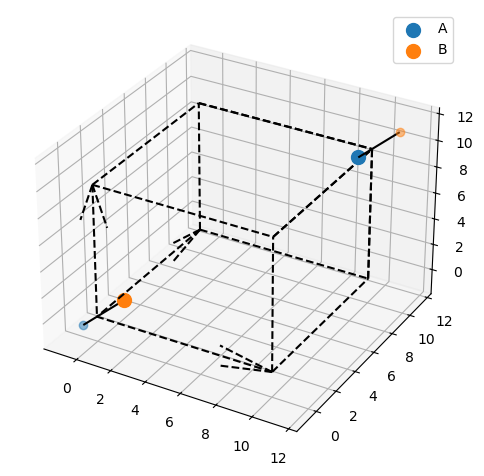

In [12]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([9.50, 9.50, 9.50], "A")
latt.add_atom([1, 1, 1], "B")
#EN ESTE CASO SE CONECTAN EN LA PERIODICIDAD, PUES EL PUNTO PERIODICA MAS CERCANO ESTA MAS CERCA QUE EL PUNTO EN EL MISMO PERIODO
latt.add_connection("A", "B", 1)
latt.analyze()
latt.plot_cell()
plt.show()

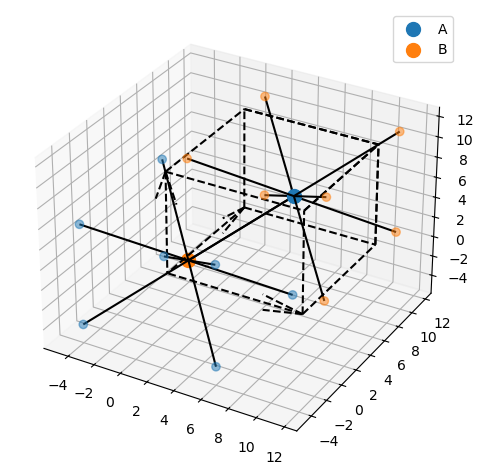

In [13]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([6, 6 ,6], "A")
latt.add_atom([1, 1, 1], "B")
# AQUI SERIA EQUIDISTANTE PUES A-B=5 Y A+10 -B = 5, COMO ES EQUIDISTANTE Y ESTA A LA MISMA DISTANCIA DE TODO, PUES 
# MOSTRARA TODAS LAS OPCIONES
latt.add_connection("A", "B", 1)
latt.analyze()
latt.plot_cell()
plt.show()

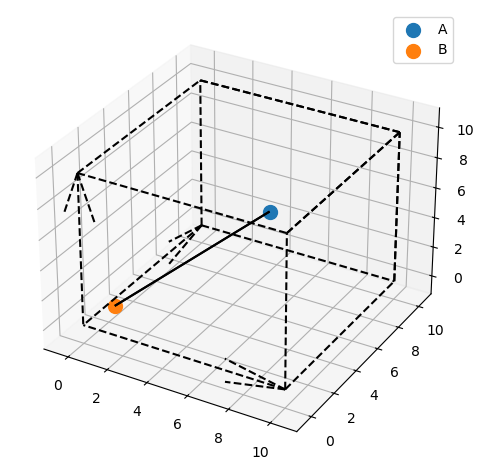

In [14]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([5.9, 5.9 ,5.9], "A")
latt.add_atom([1, 1, 1], "B")
# AQUI ESTARIA UN POCO MAS CERCA A DE B QUE DE B EN OTRO PERIODO PUES A-B=4.9 Y A+10 -B = 5.1 
#ENTONCES SE CONECTAN ENTRE ELLOS PUES SON EL PRIMER PUNTO MAS CERCANO
latt.add_connection("A", "B", 1)
latt.analyze()
latt.plot_cell()
plt.show()

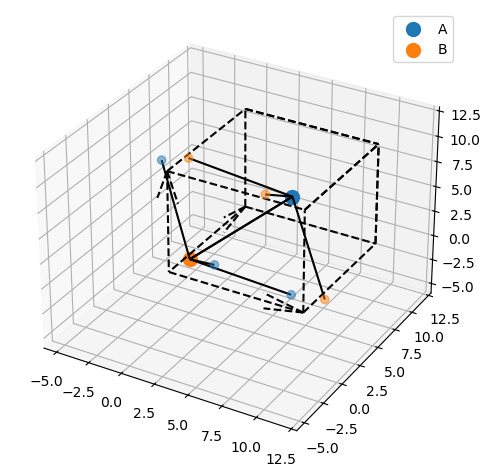

In [15]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([5.9, 5.9 ,5.9], "A")
latt.add_atom([1, 1, 1], "B")
# SI ESTAMOS EN EL MISMO CASO QUE ANTES Y PONEMOS OTRA CONEXION, ENTONCES NOS CONECTAREMOS A LOS 2 VECINOS MAS 
#CERCANOS, EN ESTE CASO A EL OTRO PUNTO Y A UNO PERIODICO, (A SE CONECTARA A B Y A 10+B O 10-B NOS MUESTRAN 
# LAS 2 OPCIONES)
latt.add_connection("A", "B", 2)
latt.analyze()
latt.plot_cell()
plt.show()

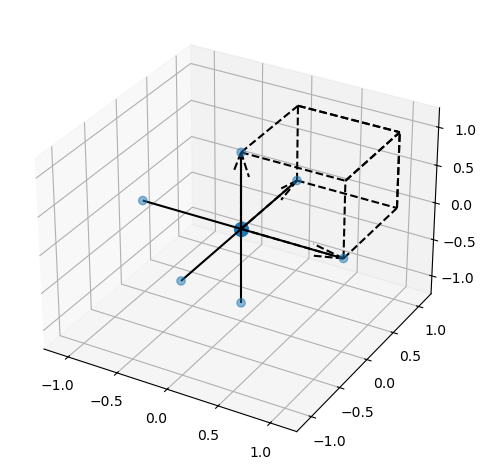

In [16]:
#aqui ya esta claro lo que pasa, como a esta en el 0,0,0 y la conexion es consigo mismo, lo unico que puede
#hacer es llegar a si 
latt = lp.Lattice.sc()
latt.add_atom()
#A LA QUE AUMENTAMOS EL PARAMETRO DE ABAJO, A BUSCA CONECTARSE CON LOS "X" PUNTOS MAS CERCANOS DE SIM MISMO, EN ESTE CASO
# CON 1 BUSCA SU PERIODICO MAS CERCANO, CON 2 BUSCA SUS 2 PERIODICOS MAS CERCANOS MOSTRANDO SIEMPRE TODAS LAS POSIBILIDADES, .....
latt.add_connections(1)
latt.plot_cell()
plt.show()

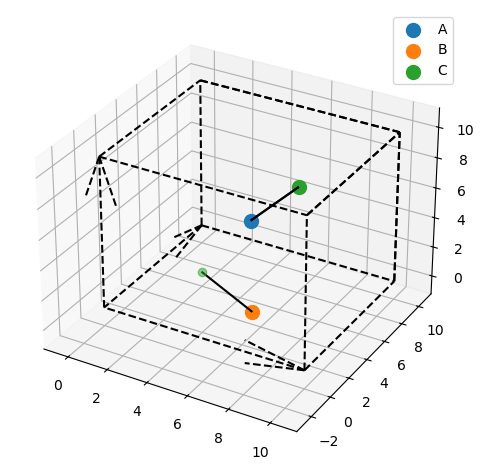

In [17]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([5, 5 ,5], "A")
latt.add_atom([7, 1, 2], "B")
latt.add_atom([6, 8, 6], "C")
# AÑADIMOS UNA CONEXION ENTRE TODOS LOS PARES DE PUNTOS:
# A USA SU UNICA CONEXION CON EL PUNTO MAS CERCANO (PUES EN CONNECTIONS ESTA PUESTO 1), EN ESTE CASO C
# B USA SU UNICA CONEXION CON EL PUNTO MAS CERCANO EN ESTE CASO C PERIODICO (ESTA MAS CERCA QUE A Y QUE B Y QUE SI MISMO TANTO EN EL MISMO PERIODO COMO EN OTRO)
# C USA SU UNICA CONEXION CON A QUE ES EL PUNTO MAS CERCANO
latt.add_connections(1)
latt.analyze()
latt.plot_cell()
plt.show()


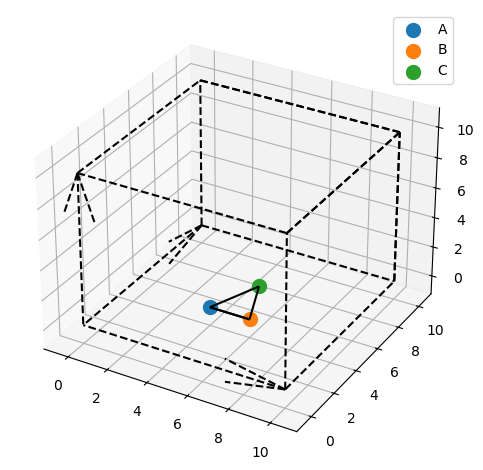

array([[ 4,  6,  0,  0],
       [ 5,  5,  0,  0],
       [ 5,  6, -1,  0],
       [ 5,  6,  1,  0],
       [ 6,  6,  0,  0],
       [ 5,  7,  0,  0]], dtype=int64)

In [18]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([4,  4,0], "A")
latt.add_atom([6, 4, 0], "B")
latt.add_atom([5, 6.598,0], "C")
# AÑADIMOS UNA CONEXION ENTRE TODOS LOS PARES DE PUNTOS:
#PONEMOS LOS PUNTOS TAL QUE FORMEN UN TRIANGULO EQUILATERO
latt.add_connections(1)
latt.analyze()
latt.plot_cell()
plt.show()
#DAME LOS VECINOS DE C A DISTANCIA 2 (no osn las conexiones)

latt.get_neighbors([5, 6.598,0], alpha=0, distidx=2)
#latt.compute_connections
#lp.structure.connection_color_array

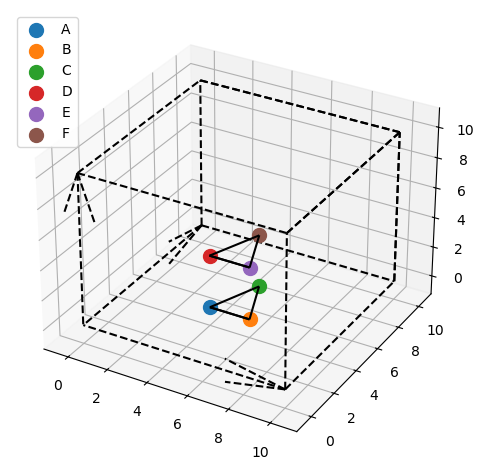

In [19]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([4,  4,0], "A")
latt.add_atom([6, 4, 0], "B")
latt.add_atom([5, 6.598,0], "C")
latt.add_atom([4,  4,3.5], "D")
latt.add_atom([6, 4, 3.5], "E")
latt.add_atom([5, 6.598,3.5], "F")
# AÑADIMOS UNA CONEXION ENTRE TODOS LOS PARES DE PUNTOS:
#CREAMOS OTRO TRIANGULO EQUILATERO IGUAL PERO A 3,5 DE DISTANCIA HACIA ARRIBA
#AQUI NO SACAMOS NADA EN CLARO, PUES LA DISTANCIA ENTRE LOS PUNTOS DE ABAJO Y LOS DE ARRIBA ES 3,5 Y LA DISTANCIA
#ENTRE LOS DE ABAJO ES 3 ENTONCES SIGUE PREFIRIENDO A LOS DE ABAJO, PERO SI AUMENTAMOS LAS CONEXIONES QUIZAS SI
latt.add_connections(1)
latt.analyze()
latt.plot_cell()
plt.show()

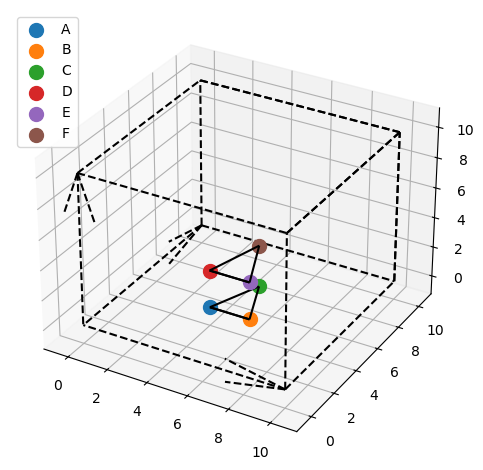

In [20]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([4,  4,0], "A")
latt.add_atom([6, 4, 0], "B")
latt.add_atom([5, 6.598,0], "C")
latt.add_atom([4,  4,2.5], "D")
latt.add_atom([6, 4, 2.5], "E")
latt.add_atom([5, 6.598,2.8], "F")
#VEMOS QUE AUMENTANDO LAS CONEXIONES PARA VER COMO FUNCIONA EL METODO ADD_CONECTIONS
#CONEXIONES DE A
latt.add_connection("A", "B", 1)
latt.add_connection("A", "C", 1)
latt.add_connection("A", "D", 1)
latt.add_connection("A", "E", 1)
latt.add_connection("A", "F", 1)
#CONEXIONES DE B
latt.add_connection("B", "A", 1)
latt.add_connection("B", "C", 1)
latt.add_connection("B", "D", 1)
latt.add_connection("B", "E", 1)
latt.add_connection("B", "F", 1)
#CONEXIONES DE C
latt.add_connection("C", "A", 1)
latt.add_connection("C", "B", 1)
latt.add_connection("C", "D", 1)
latt.add_connection("C", "E", 1)
latt.add_connection("C", "F", 1)
#CONEXIONES CON D
latt.add_connection("D", "A", 1)
latt.add_connection("D", "B", 1)
latt.add_connection("D", "C", 1)
latt.add_connection("D", "E", 1)
latt.add_connection("D", "F", 1)
#CONEXIONES CON E
latt.add_connection("E", "A", 1)
latt.add_connection("E", "B", 1)
latt.add_connection("E", "C", 1)
latt.add_connection("E", "D", 1)
latt.add_connection("E", "F", 1)
#CONEXIONES CON F
latt.add_connection("F", "A", 1)
latt.add_connection("F", "B", 1)
latt.add_connection("F", "C", 1)
latt.add_connection("F", "D", 1)
latt.add_connection("F", "E", 1)
latt.analyze()
latt.plot_cell()
plt.show()

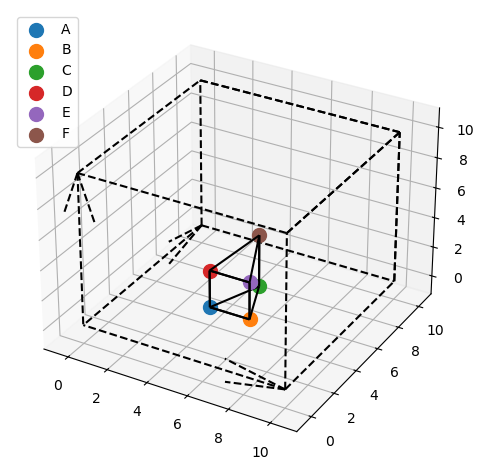

In [23]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([4,  4,0], "A")
latt.add_atom([6, 4, 0], "B")
latt.add_atom([5, 6.598,0], "C")
latt.add_atom([4,  4,2.5], "D")
latt.add_atom([6, 4, 2.5], "E")
latt.add_atom([5, 6.598,3.5], "F")
#VEMOS QUE AUMENTANDO LAS CONEXIONES PARA VER COMO FUNCIONA EL METODO ADD_CONECTIONS
#CONEXIONES DE A
latt.add_connection("A", "B", 2)
latt.add_connection("A", "C", 2)
latt.add_connection("A", "D", 2)
latt.add_connection("A", "E", 2)
latt.add_connection("A", "F", 2)
#CONEXIONES DE B
latt.add_connection("B", "A", 2)
latt.add_connection("B", "C", 2)
latt.add_connection("B", "D", 2)
latt.add_connection("B", "E", 2)
latt.add_connection("B", "F", 2)
#CONEXIONES DE C
latt.add_connection("C", "A", 2)
latt.add_connection("C", "B", 2)
latt.add_connection("C", "D", 2)
latt.add_connection("C", "E", 2)
latt.add_connection("C", "F", 2)
#CONEXIONES CON D
latt.add_connection("D", "A", 2)
latt.add_connection("D", "B", 2)
latt.add_connection("D", "C", 2)
latt.add_connection("D", "E", 2)
latt.add_connection("D", "F", 2)
#CONEXIONES CON E
latt.add_connection("E", "A", 2)
latt.add_connection("E", "B", 2)
latt.add_connection("E", "C", 2)
latt.add_connection("E", "D", 2)
latt.add_connection("E", "F", 2)
#CONEXIONES CON F
latt.add_connection("F", "A", 2)
latt.add_connection("F", "B", 2)
latt.add_connection("F", "C", 2)
latt.add_connection("F", "D", 2)
latt.add_connection("F", "E", 2)
latt.analyze()
latt.plot_cell()
plt.show()

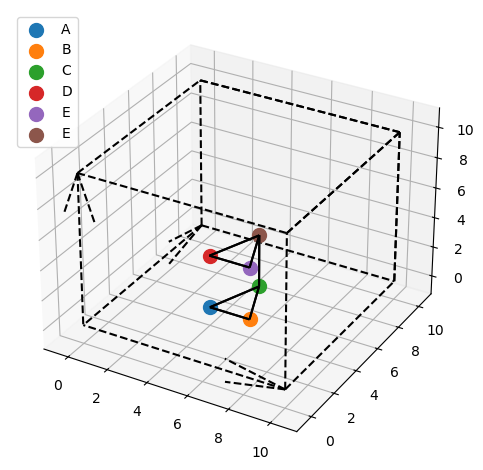

In [22]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([4,  4,0], "A")
latt.add_atom([6, 4, 0], "B")
latt.add_atom([5, 6.598,0], "C")
latt.add_atom([4,  4,3.5], "D")
latt.add_atom([6, 4, 3.5], "E")
latt.add_atom([5, 6.598,3.5], "E")
#VEMOS QUE AUMENTANDO LAS CONEXIONES SOLO C SE UNE CON F, QUIZAS SEA POR COMO SE HACEN LAS CONEXIONES, PERO MI 
#TEORIA ES QUE AL HACER 2 CONEXIONES, C DEBERIA CONECTARSE A "A" Y A "B", PUES ESTAN A 3 DE DISTANCIAS, "F" ESTA 
#A 3,5 LO CUAL ES MAS.
latt.add_connections(2)
latt.analyze()
latt.plot_cell()
plt.show()

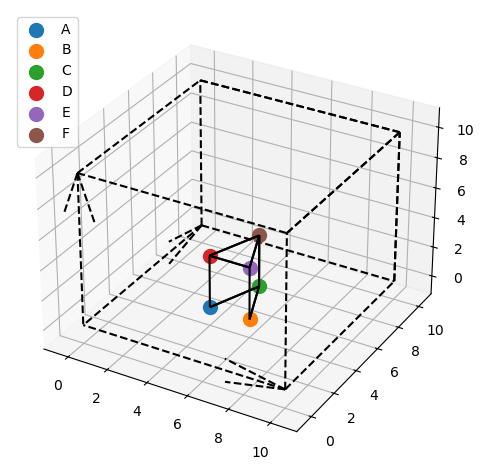

In [23]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([4,  4,0], "A")
latt.add_atom([6, 4, 0], "B")
latt.add_atom([5, 6.598,0], "C")
latt.add_atom([4,  4,3.5], "D")
latt.add_atom([6, 4, 3.5], "E")
latt.add_atom([5, 6.598,3.5], "F")
#VEMOS QUE AUMENTANDO LAS CONEXIONES PARA VER COMO FUNCIONA EL METODO ADD_CONECTIONS
#CONEXIONES DE A


latt.add_connection("A", "D", 2)
latt.add_connection("A", "E", 2)
latt.add_connection("A", "F", 2)
#CONEXIONES DE B


latt.add_connection("B", "D", 2)
latt.add_connection("B", "E", 2)
latt.add_connection("B", "F", 2)
#CONEXIONES DE C
latt.add_connection("C", "A", 2)
latt.add_connection("C", "B", 2)
latt.add_connection("C", "D", 2)
latt.add_connection("C", "E", 2)
latt.add_connection("C", "F", 2)
#CONEXIONES CON D
latt.add_connection("D", "A", 2)
latt.add_connection("D", "B", 2)
latt.add_connection("D", "C", 2)
latt.add_connection("D", "E", 2)
latt.add_connection("D", "F", 2)
#CONEXIONES CON E
latt.add_connection("E", "A", 2)
latt.add_connection("E", "B", 2)
latt.add_connection("E", "C", 2)
latt.add_connection("E", "D", 2)
latt.add_connection("E", "F", 2)
#CONEXIONES CON F
latt.add_connection("F", "A", 2)
latt.add_connection("F", "B", 2)
latt.add_connection("F", "C", 2)
latt.add_connection("F", "D", 2)
latt.add_connection("F", "E", 2)
latt.analyze()
latt.plot_cell()
plt.show()

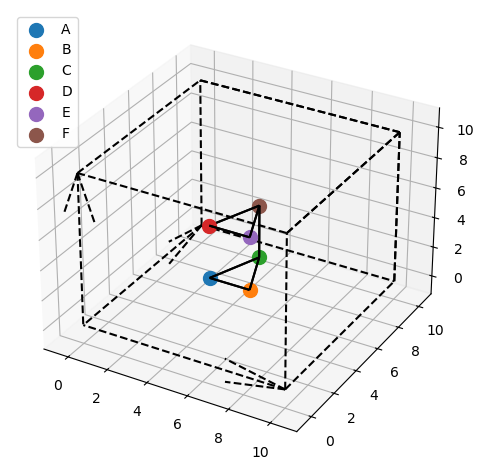

In [24]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([4,  4,2], "A")
latt.add_atom([6, 4, 2], "B")
latt.add_atom([5, 6.598,2], "C")
latt.add_atom([4,  4,5.5], "D")
latt.add_atom([6, 4, 5.5], "E")
latt.add_atom([5, 6.598,5.5], "F")
#VEMOS QUE AUMENTANDO LAS CONEXIONES PARA VER COMO FUNCIONA EL METODO ADD_CONECTIONS
#CON TODO 2 CONEXIONES ES IGUAL QUE CON TODO 1 CONEXION MENOS EN EL F Y EN EL C QUE METEMOS 2, EN CAMBIO, SI METO
#2 EN EL A Y EL E, NO APARECE NADA, ENTIENDO QUE ES VISUAL.
#CONEXIONES DE A
latt.add_connection("A", "B", 1)
latt.add_connection("A", "C", 1)
latt.add_connection("A", "D", 1)
latt.add_connection("A", "E", 2)
latt.add_connection("A", "F", 1)
#CONEXIONES DE B
latt.add_connection("B", "A", 1)
latt.add_connection("B", "C", 1)
latt.add_connection("B", "D", 1)
latt.add_connection("B", "E", 2)
latt.add_connection("B", "F", 1)
#CONEXIONES DE C
latt.add_connection("C", "A", 1)
latt.add_connection("C", "B", 1)
latt.add_connection("C", "D", 1)
latt.add_connection("C", "E", 1)
latt.add_connection("C", "F", 2)
#CONEXIONES CON D
latt.add_connection("D", "A", 1)
latt.add_connection("D", "B", 1)
latt.add_connection("D", "C", 1)
latt.add_connection("D", "E", 1)
latt.add_connection("D", "F", 1)
#CONEXIONES CON E
latt.add_connection("E", "A", 2)
latt.add_connection("E", "B", 2)
latt.add_connection("E", "C", 1)
latt.add_connection("E", "D", 1)
latt.add_connection("E", "F", 1)
#CONEXIONES CON F
latt.add_connection("F", "A", 1)
latt.add_connection("F", "B", 1)
latt.add_connection("F", "C", 2)
latt.add_connection("F", "D", 1)
latt.add_connection("F", "E", 1)
latt.analyze()
latt.plot_cell()
plt.show()

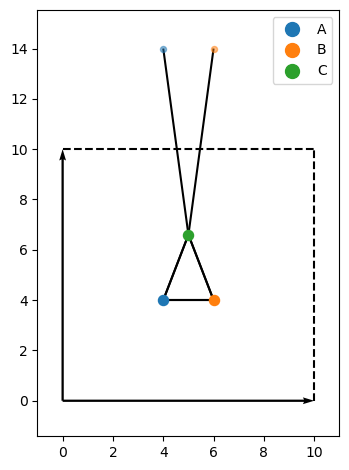

In [25]:
latt = lp.Lattice.square(a=10)
latt.add_atom([4,  4], "A")
latt.add_atom([6, 4], "B")
latt.add_atom([5, 6.598], "C")
#VEMOS QUE AUMENTANDO LAS CONEXIONES PARA VER COMO FUNCIONA EL METODO ADD_CONECTIONS

latt.add_connections(2)
latt.analyze()
latt.plot_cell()
plt.show()

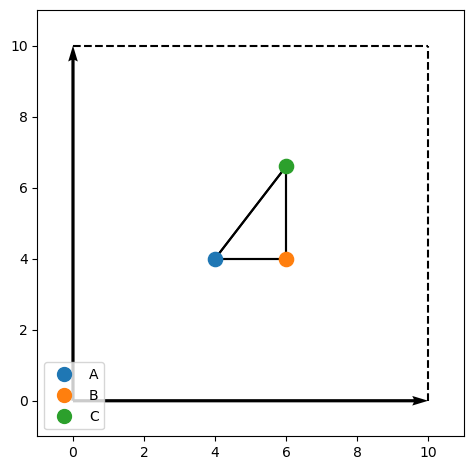

In [26]:
latt = lp.Lattice.square(a=10)
latt.add_atom([4,  4], "A")
latt.add_atom([6, 4], "B")
latt.add_atom([6, 6.598], "C")
#VEMOS QUE AUMENTANDO LAS CONEXIONES PARA VER COMO FUNCIONA EL METODO ADD_CONECTIONS
#AL SER EL TRIANGULO EQUILATERO, C MUESTRA APARENTEMENTE 4 CONEXIONES ( 1 CON A OTRA CON B Y DOS CON A Y B PERIODIRCOS), PERO REALMENTE
# MUESTRA 2 PHANTOM CONNECTIONS POSBIELS, 1 CON A Y B AL MISMO TIEMPO QUE SOLO CUENTA OCMO 1 Y LUEGO LA OTRA CON A Y B PERIODICOS QUE SOLO CUENTA COMO 1
# TAMBIEN, PUES ES UNA ELECCION, EN EL MOMENTO QUE C ESTA MAS CERCA DE B, YA MUESTRA QUE SUS 2 CONEXIONES MAS CERCANAS NO SON VARIAS, LA ELECCION
# YA ESTA CLARA, QUE SERIA A Y B
latt.add_connections(2)
latt.analyze()
latt.plot_cell()
plt.show()

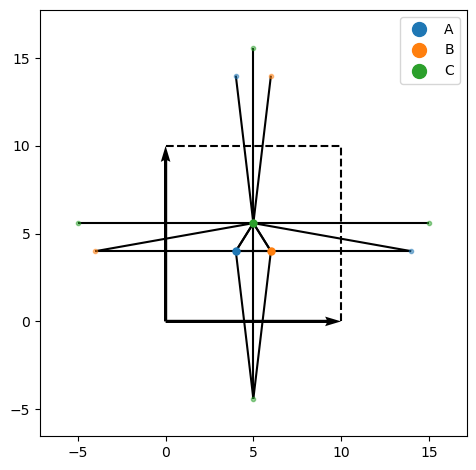

In [27]:
latt = lp.Lattice.square(a=10)
latt.add_atom([4,  4], "A")
latt.add_atom([6, 4], "B")
latt.add_atom([5, 5.598], "C")
#VEMOS QUE AUMENTANDO LAS CONEXIONES PARA VER COMO FUNCIONA EL METODO ADD_CONECTIONS
#PORQUE SOLO C TIENE NUEVAS CONEXIONES? 
latt.add_connections(4)
latt.analyze()
latt.plot_cell()
plt.show()

El átomo en el índice 0 tiene conexiones con los siguientes índices:
[6 1]
Las posiciones de los vecinos son:
[array([1., 0.]), array([0., 1.])]


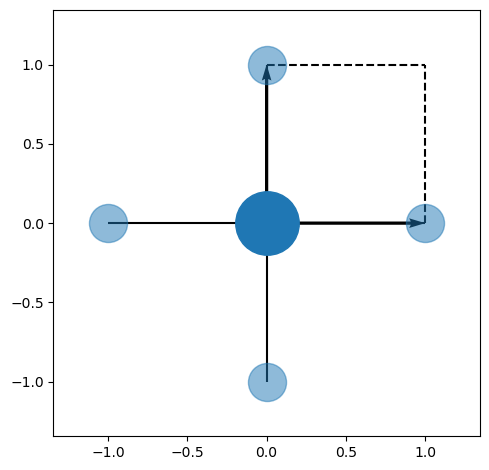

In [28]:

"""
Definimos una red cuadrada como ejemplo
La base es la matriz identidad para una red 2D simple
"""
latt = lp.Lattice(np.eye(2))

#Agregamos un átomo en la celda unitaria
latt.add_atom()

#Agregamos conexiones de primer vecino
latt.add_connections(1)

#Construimos la red con un tamaño finito, por ejemplo, 5x5
latt.build((5,5))

#Seleccionamos el índice de un sitio específico (por ejemplo, el primero)
site_index = 0  # Puedes elegir otro índice dentro del rango del sistema construido

#Obtenemos los vecinos (conexiones) del sitio seleccionado
neighbors = latt.neighbors(site_index)

#Mostramos los resultados
print(f"El átomo en el índice {site_index} tiene conexiones con los siguientes índices:")
print(neighbors)

#Mostramos también las posiciones de los vecinos
positions = [latt.position(neighbor) for neighbor in neighbors]
print("Las posiciones de los vecinos son:")
print(positions)
latt.plot_cell()
plt.show()

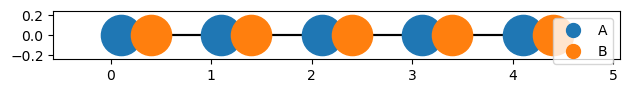

In [29]:
#RETICULO DIMENSION 5 EN 1D CON 1 CONEXION
latt = lp.Lattice(np.eye(1))

latt.add_atom([0.1], "A")
latt.add_atom([0.4], "B")

#Agregamos conexiones de primer vecino
latt.add_connections(1)

#Construimos la red con un tamaño finito, por ejemplo, 5
latt.build((5))

latt.analyze()
latt.plot()
plt.show()

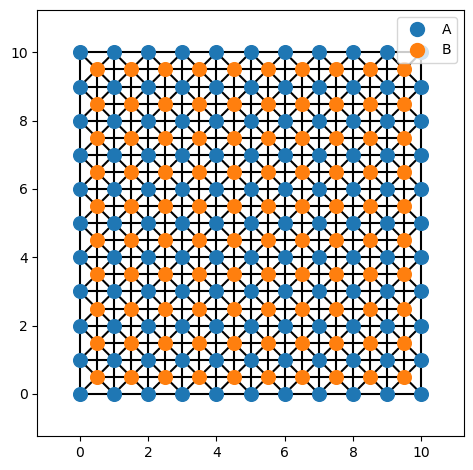

In [21]:
#RETICULO 5X5 EN 2D CON 1 CONEXION
latt = lp.Lattice(np.eye(2))

latt.add_atom([1,  1], "A")
latt.add_atom([1.5,  1.5], "B")
#latt.add_atom([5,  5], "B")
#Agregamos conexiones de primer vecino
latt.add_connections(1)

#Construimos la red con un tamaño finito, por ejemplo, 5x5
latt.build((10,10))

latt.analyze()
latt.plot()
plt.show()

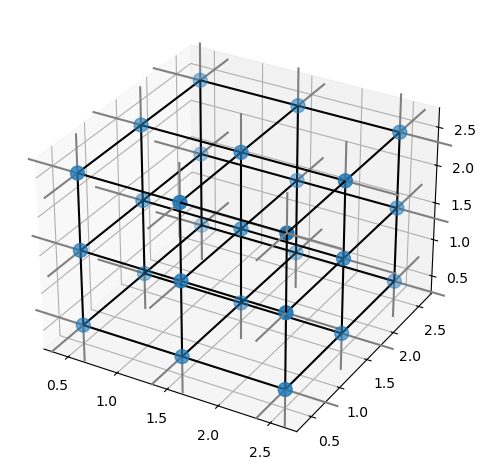

In [15]:
#RETICULO 5X5 EN 2D CON 1 CONEXION
latt = lp.Lattice(np.eye(3))

latt.add_atom([0.5,  0.5, 0.5], "A")

#Agregamos conexiones de primer vecino
latt.add_connections(1)
#Construimos la red con un tamaño finito, por ejemplo, 5x5
latt.build((3,3, 3))
latt.set_periodic([0, 1,2])

latt.analyze()
latt.plot()
plt.show()

In [3]:
#RETICULO 5X5X5X5X5X5X5 EN 3D CON 2 CONEXIONes
latt = lp.Lattice(np.eye(7))
latt.add_atom([0.1,  0.1, 0.1,0.1,  0.1, 0.1,0.1], "A")
latt.add_atom([0.4, 0.4, 0.4,0.4, 0.4, 0.4,0.4], "B")
#Agregamos conexiones de primer vecino
latt.add_connections(2)
#Construimos la red con un tamaño finito, por ejemplo, 5x5
latt.build((5,5,5,5,5,5,5))
latt.analyze()

#Seleccionamos el índice de un sitio específico (por ejemplo, el primero)
site_index = 0  # Puedes elegir otro índice dentro del rango del sistema construido

#Obtenemos los vecinos (conexiones) del sitio seleccionado
neighbors = latt.neighbors(site_index)

#Mostramos los resultados
print(f"El átomo en el índice {site_index} tiene conexiones con los siguientes índices:")
print(neighbors)

#Mostramos también las posiciones de los vecinos
positions = [latt.position(neighbor) for neighbor in neighbors]

print("Las posiciones de los vecinos son:")
print(positions)

#latt.plot()
#plt.show()

El átomo en el índice 0 tiene conexiones con los siguientes índices:
[    1 31250   250     2  6250    10  1250    50    12   300  6300  1300
  6500  1260    60   260   252 37500  1500 31300 31500 31260  6260  1252
 32500    52 31252  7500  6252]
Las posiciones de los vecinos son:
[array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]), array([1.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]), array([0.1, 0.1, 0.1, 1.1, 0.1, 0.1, 0.1]), array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1.1]), array([0.1, 1.1, 0.1, 0.1, 0.1, 0.1, 0.1]), array([0.1, 0.1, 0.1, 0.1, 0.1, 1.1, 0.1]), array([0.1, 0.1, 1.1, 0.1, 0.1, 0.1, 0.1]), array([0.1, 0.1, 0.1, 0.1, 1.1, 0.1, 0.1]), array([0.1, 0.1, 0.1, 0.1, 0.1, 1.1, 1.1]), array([0.1, 0.1, 0.1, 1.1, 1.1, 0.1, 0.1]), array([0.1, 1.1, 0.1, 0.1, 1.1, 0.1, 0.1]), array([0.1, 0.1, 1.1, 0.1, 1.1, 0.1, 0.1]), array([0.1, 1.1, 0.1, 1.1, 0.1, 0.1, 0.1]), array([0.1, 0.1, 1.1, 0.1, 0.1, 1.1, 0.1]), array([0.1, 0.1, 0.1, 0.1, 1.1, 1.1, 0.1]), array([0.1, 0.1, 0.1, 1.1, 0.1, 1.1, 0.1]), array([0.1, 0

In [34]:
#BENCHMARKING

#VARIABLES
dimensiones = 7
num_atoms= 2
num_conex=1
limite = 2
atom_index = 0

# Comenzamos el benchmarking
start_total = time.time()  # Marca el inicio del tiempo total
# Creación de la red
start = time.time()
latt = lp.Lattice(np.eye(dimensiones))
print(f"Tiempo para construir el reticulo {dimensiones} dimensional: {time.time() - start:.5f} segundos")
# Agregar átomos a la red
start = time.time()
crear_atomos(latt, num_atoms, dimensiones)
print(f"Tiempo para agregar átomos: {time.time() - start:.5f} segundos")
# Agregar conexiones de primer vecino
start = time.time()
latt.add_connections(num_conex)
print(f"Tiempo para agregar conexiones de los primeros {num_conex} vecinos mas cercanos: {time.time() - start:.5f} segundos")

# Construir la red con tamaño finito
start = time.time()
latt.build((limite,) * dimensiones)
print(f"Tiempo para construir la red de tamaño {' x '.join([str(limite)] * dimensiones)}:: {time.time() - start:.5f} segundos")

# Analizar la red
start = time.time()
latt.analyze()
print(f"Tiempo para analizar la red: {time.time() - start:.5f} segundos")

atom_index = 0
# Obtener vecinos del sitio seleccionado
start = time.time()
neighbors = latt.neighbors(atom_index)
print(f"Tiempo para obtener vecinos del átomo {atom_index}: {time.time() - start:.5f} segundos")

# Obtener posiciones de los vecinos
start = time.time()
positions = [latt.position(neighbor) for neighbor in neighbors]
#print("Las posiciones de los vecinos son:")
#print(positions)
print(f"Tiempo para obtener posiciones de los vecinos: {time.time() - start:.5f} segundos")

# Tiempo total
print(f"Tiempo total de ejecución: {time.time() - start_total:.5f} segundos")

Tiempo para construir el reticulo 7 dimensional: 0.00000 segundos
Tiempo para agregar átomos: 0.00114 segundos
Tiempo para agregar conexiones de los primeros 1 vecinos mas cercanos: 0.67070 segundos
Tiempo para construir la red de tamaño 2 x 2 x 2 x 2 x 2 x 2 x 2:: 0.02310 segundos
Tiempo para analizar la red: 0.66888 segundos
Tiempo para obtener vecinos del átomo 0: 0.00000 segundos
Tiempo para obtener posiciones de los vecinos: 0.00000 segundos
Tiempo total de ejecución: 1.36481 segundos


Coordenadas del punto más cercano desde el punto objetivo [6 6]: [5 5]
Coordenadas del vector más cercano desde el punto objetivo [6 6]: [-1, -1]
Norma del vector más cercano: 1.41


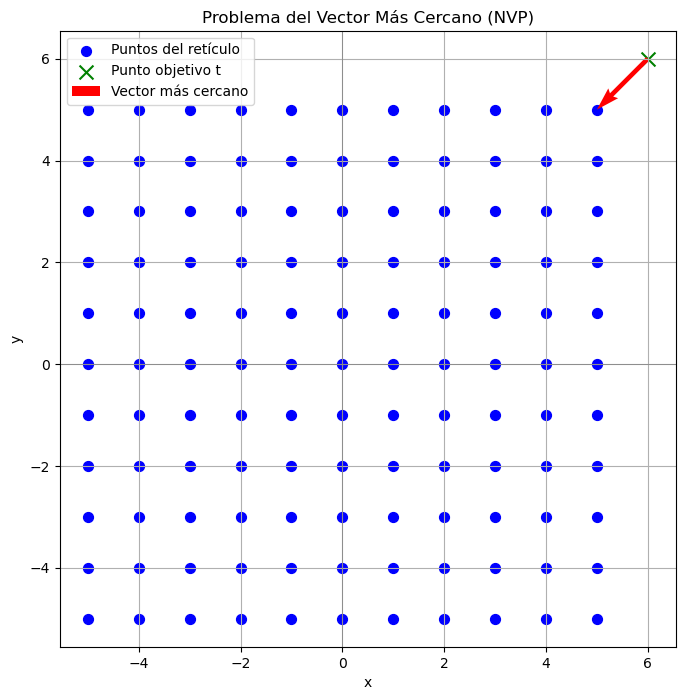

In [46]:
# Base para el retículo (2D)
base = np.array([[1, 0], [0, 1]])  # Base de un retículo triangular
num_atoms = 1
dimensiones = 2
target_point = np.array([6,6])  # Punto sobre el que buscar el vector mas cercano
limite = 5
# Crear el retículo con lattpy
latt = lp.Lattice(base)
crear_atomos(latt, num_atoms, dimensiones)
latt.add_connections(1)  # Conexión de primer vecino

# Construir un retículo finito de tamaño 5x5
latt.build((5, 5))

# Generar puntos del retículo
puntos_reticulo = generar_puntos_reticulo(base, limite)

# Temporizador: Medir solo el tiempo de encontrar el vector más cercano
start_time = time.time()
nearest_vector, nearest_norm = nearestVector(base, limite, puntos_reticulo, target_point)
# Fin del temporizador
end_time = time.time()


nearest_point =  target_point + nearest_vector

# Imprimir el vector más cercano con todas las coordenadas
print(f"Coordenadas del punto más cercano desde el punto objetivo {target_point}: {nearest_point}")
print(f"Coordenadas del vector más cercano desde el punto objetivo {target_point}: {np.array2string(nearest_vector, separator=', ')}")
print(f"Norma del vector más cercano: {nearest_norm:.2f}")


# Visualización
plt.figure(figsize=(8, 8))

# Puntos del retículo
plt.scatter(puntos_reticulo[:, 0], puntos_reticulo[:, 1], c="blue", label="Puntos del retículo", s=50)  # Aumentar tamaño de los puntos

# Punto objetivo t
plt.scatter(target_point[0], target_point[1], c="green", label="Punto objetivo t", s=100, marker="x")  # Diferenciar el punto objetivo

# Vector más cercano (ajustar la escala)
# La flecha va desde target_point hasta nearest_point
plt.quiver(target_point[0], target_point[1], nearest_point[0] - target_point[0], nearest_point[1] - target_point[1],
           angles='xy', scale_units='xy', scale=1, color="red", label="Vector más cercano")  # Ajuste la escala para la visualización

# Líneas de referencia para los ejes
plt.axhline(0, color="gray", lw=0.5)
plt.axvline(0, color="gray", lw=0.5)

# Configurar la vista para que la relación de aspecto sea igual (para que los ejes no distorsionen)
plt.gca().set_aspect('equal', adjustable='box')

# Agregar leyenda y título
plt.legend()
plt.title("Problema del Vector Más Cercano (NVP)")
plt.xlabel("x")
plt.ylabel("y")

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


Coordenadas del punto más cercano desde el punto objetivo [6 6 6]: [5 5 5]
Coordenadas del vector más cercano desde el punto objetivo [6 6 6]: [-1, -1, -1]
Norma del vector más cercano: 1.73


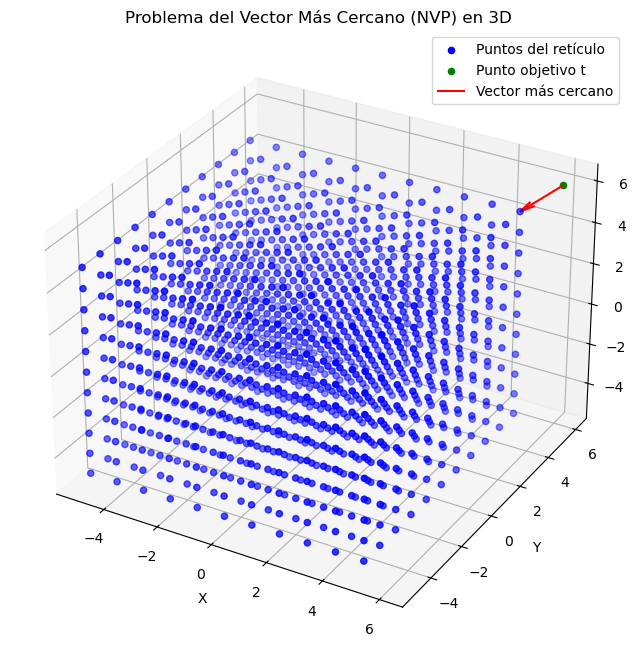

In [47]:
# Base para el retículo (3D)
base = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Base de un retículo triangular 3D
num_atoms = 1
dimensiones = 3
target_point = np.array([6, 6, 6])  # Punto sobre el que buscar el vector más cercano
limite= 5
# Crear el retículo con lattpy
latt = lp.Lattice(base)
crear_atomos(latt, num_atoms, dimensiones)
latt.add_connections(1)  # Conexión de primer vecino

# Construir un retículo finito de tamaño 5x5x5 (en 3D)
latt.build((5, 5, 5))

# Generar puntos del retículo
puntos_reticulo = generar_puntos_reticulo(base, limite)

# Temporizador: Medir solo el tiempo de encontrar el vector más cercano
start_time = time.time()
nearest_vector, nearest_norm = nearestVector(base, limite, puntos_reticulo, target_point)
# Fin del temporizador
end_time = time.time()

# Calcular el punto más cercano
nearest_point = target_point + nearest_vector

# Imprimir el vector más cercano con todas las coordenadas
print(f"Coordenadas del punto más cercano desde el punto objetivo {target_point}: {nearest_point}")
print(f"Coordenadas del vector más cercano desde el punto objetivo {target_point}: { np.array2string(nearest_vector, separator=', ')}")
print(f"Norma del vector más cercano: {nearest_norm:.2f}")

# Visualización en 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Puntos del retículo
ax.scatter(puntos_reticulo[:, 0], puntos_reticulo[:, 1], puntos_reticulo[:, 2], c="blue", label="Puntos del retículo")  # Puntos del retículo
ax.scatter(target_point[0], target_point[1], target_point[2], c="green", label="Punto objetivo t")  # Punto objetivo t

# Vector más cercano
ax.quiver(target_point[0], target_point[1], target_point[2], 
          nearest_point[0] - target_point[0], nearest_point[1] - target_point[1], nearest_point[2] - target_point[2],
          color="red", label="Vector más cercano", length=nearest_norm, normalize=True)

# Configurar el gráfico
ax.set_aspect('auto')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
ax.set_title("Problema del Vector Más Cercano (NVP) en 3D")
plt.show()


Coordenadas del vector más corto: [0., 1.]
Norma del vector más corto: 1.00
Tiempo para encontrar el vector más corto: 0.06354 segundos


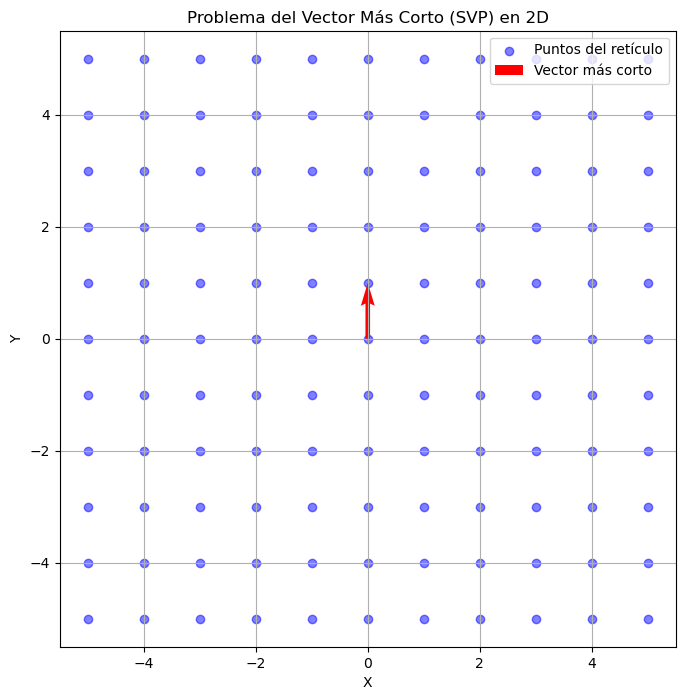

In [50]:
# PROBLEMA DEL SVP (en 2D)
# VARIABLES
dimensiones = 2  # Ahora en 2D
num_atomos = 1
num_conex = 1
limite = 5  # Limite para las combinaciones de los vectores base (por ejemplo, de -2 a 2)

# Base para el retículo (dimensiones generales)
base = np.eye(dimensiones)  # Matriz identidad para generar base genérica en 2D

# Crear el retículo con lattpy
latt = lp.Lattice(base)

# Usar la función para crear átomos
crear_atomos(latt, num_atomos, dimensiones=dimensiones)

# Agregar conexiones de vecinos
latt.add_connections(num_conex)  # Conexión de vecinos especificada

# Construir un retículo finito de tamaño especificado
latt.build((limite,) * dimensiones)

# Generar puntos del retículo
points = latt.positions  # Coordenadas de todos los puntos del retículo

# Calculamos todos los posibles puntos del reticulo
puntos_reticulo = generar_puntos_reticulo(base, limite)

# Temporizador: Medir solo el tiempo de encontrar el vector más corto
start_time = time.time()
mejor_vector, menor_norma = shortestVector(base, limite, puntos_reticulo)
# Fin del temporizador
end_time = time.time()

# Imprimir el vector más corto con todas las coordenadas
print("Coordenadas del vector más corto:", np.array2string(mejor_vector, separator=', '))
print(f"Norma del vector más corto: {menor_norma:.2f}")

# Imprimir el tiempo de ejecución del cálculo del vector más corto
print(f"Tiempo para encontrar el vector más corto: {end_time - start_time:.5f} segundos")

# Visualización en 2D del retículo y el vector más corto
plt.figure(figsize=(8, 8))

# Puntos del retículo
plt.scatter(puntos_reticulo[:, 0], puntos_reticulo[:, 1], c="blue", label="Puntos del retículo", alpha=0.5)

# Vector más corto
plt.quiver(0, 0, mejor_vector[0], mejor_vector[1], angles='xy', scale_units='xy', scale=1, color="red", label="Vector más corto", linewidth=2)

# Configurar el gráfico
plt.title("Problema del Vector Más Corto (SVP) en 2D")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()


Coordenadas del vector más corto: [0., 0., 1.]
Norma del vector más corto: 1.00
Tiempo para encontrar el vector más corto: 8.07159 segundos


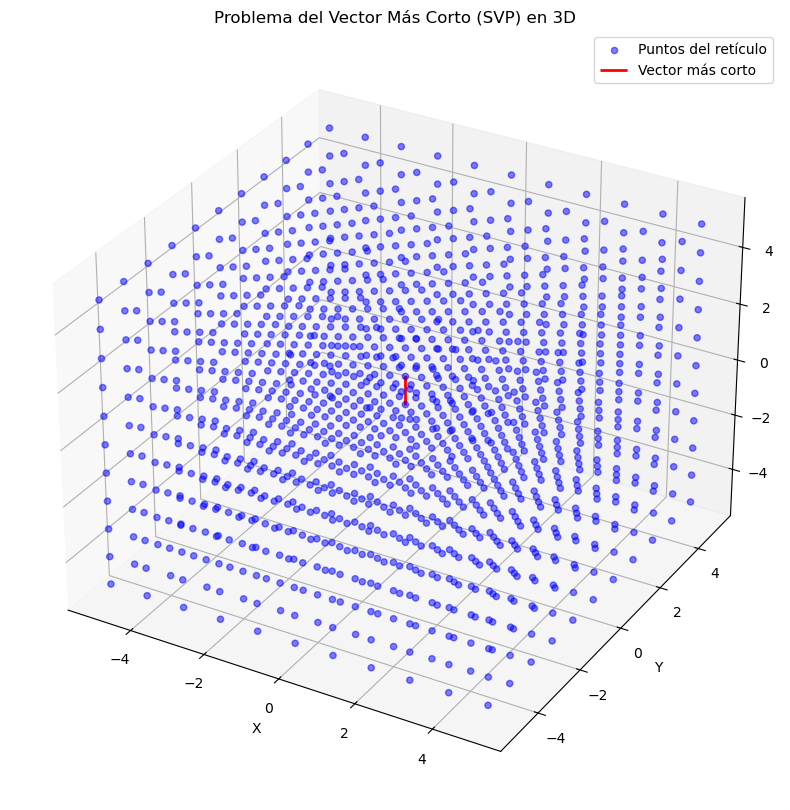

In [51]:
#PROBLEMA DEL SVP EN 3D
# VARIABLES
dimensiones = 3
num_atomos = 1
num_conex = 1
limite = 5  # Limite para las combinaciones de los vectores base (por ejemplo, de -2 a 2)

# Base para el retículo (dimensiones generales)
base = np.eye(dimensiones)  # Matriz identidad para generar base genérica en N dimensiones
#base = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Base de un retículo triangular 3D


# Crear el retículo con lattpy
latt = lp.Lattice(base)

# Usar la función para crear átomos
crear_atomos(latt, num_atomos, dimensiones=dimensiones)

# Agregar conexiones de vecinos
latt.add_connections(num_conex)  # Conexión de vecinos especificada

# Construir un retículo finito de tamaño especificado
latt.build((limite,) * dimensiones)

# Generar puntos del retículo
points = latt.positions  # Coordenadas de todos los puntos del retículo

# Calculamos todos los posibles puntos del reticulo
puntos_reticulo = generar_puntos_reticulo(base, limite)
# Temporizador: Medir solo el tiempo de encontrar el vector más corto
start_time = time.time()
mejor_vector, menor_norma =shortestVector(base, limite, puntos_reticulo)
# Fin del temporizador
end_time = time.time()

# Imprimir el vector más corto con todas las coordenadas
print("Coordenadas del vector más corto:", np.array2string(mejor_vector, separator=', '))
print(f"Norma del vector más corto: {menor_norma:.2f}")

# Imprimir el tiempo de ejecución del cálculo del vector más corto
print(f"Tiempo para encontrar el vector más corto: {end_time - start_time:.5f} segundos")

# Visualización en 3D del retículo y el vector más corto
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Puntos del retículo
ax.scatter(puntos_reticulo[:, 0], puntos_reticulo[:, 1], puntos_reticulo[:, 2], 
           c="blue", label="Puntos del retículo", alpha=0.5)

# Vector más corto
ax.quiver(0, 0, 0, 
          mejor_vector[0], mejor_vector[1], mejor_vector[2], 
          color="red", label="Vector más corto", linewidth=2, arrow_length_ratio=0.1)

# Configurar el gráfico
ax.set_title("Problema del Vector Más Corto (SVP) en 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()



In [3]:
#PROBLEMA DEL NVP
# VARIABLES
dimensiones = 7
num_atomos = 2
num_conex = 1
limite = 2  # Establecer un límite de combinaciones de enteros para generar el retículo

# Base para el retículo (dimensiones generales)
base = np.eye(dimensiones)  # Matriz identidad para generar base genérica en N dimensiones

# Crear el retículo con lattpy
latt = lp.Lattice(base)

# Usar la función para crear átomos
crear_atomos(latt, num_atomos, dimensiones=dimensiones)

# Agregar conexiones de vecinos
latt.add_connections(num_conex)  # Conexión de vecinos especificada

# Construir un retículo finito de tamaño especificado
latt.build((limite,) * dimensiones)

# Generar puntos del retículo
puntos_reticulo = generar_puntos_reticulo(base, limite)

# Definir el punto objetivo de manera arbitraria (puede ser cualquier punto en el espacio)
target_point = np.array([1.2, 0.5, 0.8, 0.1, 0.6, 0.3, 0.7])  # Ejemplo de un punto objetivo

# Temporizador: Medir solo el tiempo de encontrar el vector más cercano
start_time = time.time()
nearest_vector, nearest_norm = nearestVector(base, limite, puntos_reticulo, target_point)
# Fin del temporizador
end_time = time.time()

# Imprimir el vector más cercano con todas las coordenadas
print(f"Coordenadas del vector más cercano desde el punto objetivo {target_point}:")
print("Coordenadas del vector más cercano:", np.array2string(nearest_vector, separator=', '))
print(f"Norma del vector más cercano: {nearest_norm:.2f}")

# Imprimir el tiempo de ejecución del cálculo del vector más cercano
print(f"Tiempo para encontrar el vector más cercano: {end_time - start_time:.5f} segundos")

Coordenadas del vector más cercano desde el punto objetivo [1.2 0.5 0.8 0.1 0.6 0.3 0.7]:
Coordenadas del vector más cercano: [-0.2, -0.5,  0.2, -0.1,  0.4, -0.3,  0.3]
Norma del vector más cercano: 0.82
Tiempo para encontrar el vector más cercano: 0.72151 segundos


In [6]:
#PROBLEMA DEL SVP
# VARIABLES
dimensiones = 3
num_atomos = 3
num_conex = 1
limite = 3  # Limite para las combinaciones de los vectores base (por ejemplo, de -2 a 2)

# Base para el retículo (dimensiones generales)
#base = np.eye(dimensiones)  # Matriz identidad para generar base genérica en N dimensiones
base = np.array([[1.3, 0, 0], [0, np.sqrt(3)/2, 0], [0, 0, 0.1]])  # Base de un retículo triangular 3D

# Crear el retículo con lattpy
latt = lp.Lattice(base)

# Usar la función para crear átomos
crear_atomos(latt, num_atomos, dimensiones=dimensiones)

# Agregar conexiones de vecinos
latt.add_connections(num_conex)  # Conexión de vecinos especificada

# Construir un retículo finito de tamaño especificado
latt.build((limite,) * dimensiones)

# Generar puntos del retículo
points = latt.positions  # Coordenadas de todos los puntos del retículo

# Calculamos todos los posibles puntos del reticulo
puntos_reticulo = generar_puntos_reticulo(base, limite)
# Temporizador: Medir solo el tiempo de encontrar el vector más corto
start_time = time.time()
mejor_vector, menor_norma =shortestVector(base, limite, puntos_reticulo)
# Fin del temporizador
end_time = time.time()

# Imprimir el vector más corto con todas las coordenadas
print("Coordenadas del vector más corto:", np.array2string(mejor_vector, separator=', '))
print(f"Norma del vector más corto: {menor_norma:.2f}")

# Imprimir el tiempo de ejecución del cálculo del vector más corto
print(f"Tiempo para encontrar el vector más corto: {end_time - start_time:.5f} segundos")



Coordenadas del vector más corto: [0. , 0. , 0.1]
Norma del vector más corto: 0.10
Tiempo para encontrar el vector más corto: 0.54414 segundos
